# TIME SERIES ANALYSIS

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\hpanc\\Data_Science\\Internship_Module\\20230730_Timeseries_Overview'

In [4]:
os.chdir(r"C:\Users\hpanc\Data_Science\Internship_Module\amazon data")

In [5]:
os.listdir()

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
data=pd.DataFrame()

for i in os.listdir():
    df=pd.read_csv(i)
    data=pd.concat([data,df],ignore_index=True)

In [7]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# TIME SERIES EDA 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
data["Quantity Ordered"].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

In [72]:
data_new=data.loc[~(data["Quantity Ordered"]=='Quantity Ordered')]

In [73]:
data_new.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [74]:
data_new.dropna(inplace=True)

In [75]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [76]:
data_new.reset_index(drop=True,inplace=True)

In [77]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [78]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [85]:
data_new["Order ID"]=data_new["Order ID"].astype("int")

In [79]:
data_new["Quantity Ordered"]=data_new["Quantity Ordered"].astype("int")

In [80]:
data_new["Price Each"]=data_new["Price Each"].astype("float")

In [86]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 7.1+ MB


In [83]:
data_new["Order Date"]=pd.to_datetime(data_new["Order Date"])

In [84]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 7.8+ MB


In [87]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [88]:
data_new["sales"]=data_new["Quantity Ordered"]*data_new["Price Each"]

In [91]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [92]:
data_new["month"]=data_new["Order Date"].dt.month

In [97]:
data_new["month_name"]=data_new["Order Date"].dt.month_name()

In [120]:
pd.DataFrame(data_new.groupby("month_name")["sales"].sum()).reset_index()

,month_name,sales
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


In [104]:
data_month=pd.DataFrame(data_new.groupby("month_name")["sales"].sum()).reset_index()

In [121]:
data_month.to_csv("amazon_month vs sales analysis.csv")

In [105]:
data_month

,month_name,sales
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


In [107]:
import matplotlib.pyplot as plt

In [108]:
col_nam=["r","maroon","olive","orange","cyan","black","green","darkgreen","yellow","magenta","darkblue","blue"]

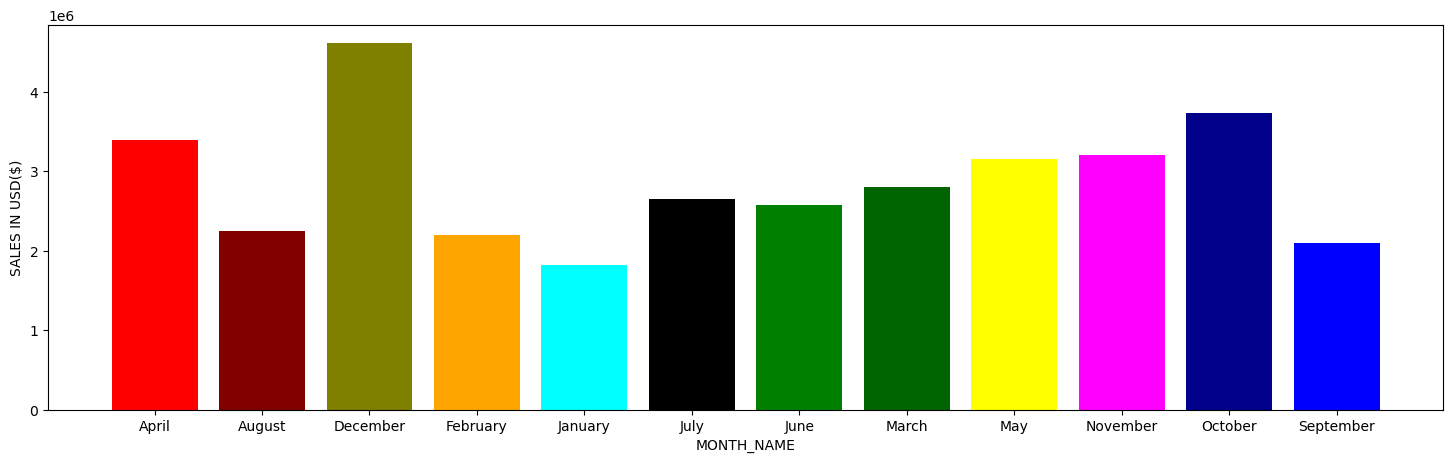

In [122]:
tobi=plt.figure(figsize=(18,5))
plt.bar(x="month_name",height="sales",data=data_month,color=col_nam)
plt.xticks(data_month["month_name"])
plt.ylabel("SALES IN USD($)")
plt.xlabel("MONTH_NAME")
plt.axis("tight")
plt.show()

In [123]:
tobi.savefig("amazon_month vs sales.png")

In [124]:
data_new["day"]=data_new["Order Date"].dt.day

In [125]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30


In [126]:
data_sales_day=pd.DataFrame(data_new.groupby("day")["sales"].sum()).reset_index()

In [128]:
data_sales_day

,day,sales
0,1,1166319.25
1,2,1137457.04
2,3,1074432.90
3,4,1163857.72
4,5,1135284.73
5,6,1151956.09
6,7,1094796.63
7,8,1107963.49
8,9,1169250.43
9,10,1169108.73


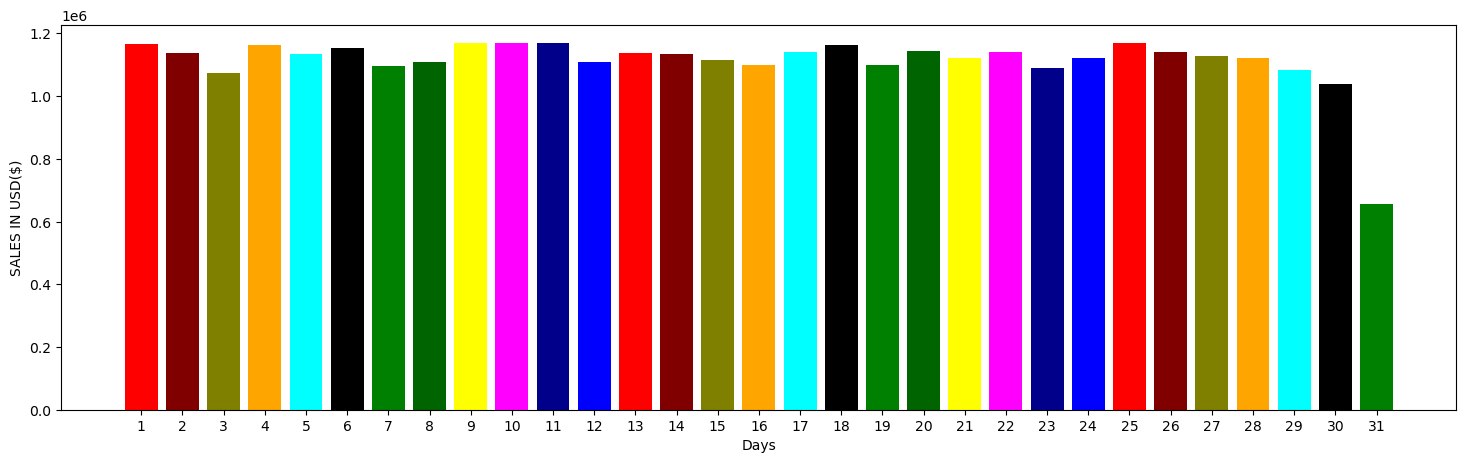

In [129]:
tobi=plt.figure(figsize=(18,5))
plt.bar(x="day",height="sales",data=data_sales_day,color=col_nam)
plt.xticks(data_sales_day["day"])
plt.ylabel("SALES IN USD($)")
plt.xlabel("Days")
plt.axis("tight")
plt.show()

In [130]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30


In [131]:
data_new["day_name"]=data_new["Order Date"].dt.day_name()

In [132]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day,day_name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19,Friday
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7,Sunday
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12,Friday
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12,Friday
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30,Tuesday


In [133]:
data_new["hour"]=data_new["Order Date"].dt.hour

In [134]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day,day_name,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19,Friday,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7,Sunday,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12,Friday,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12,Friday,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30,Tuesday,9


In [135]:
data_sales_hour=pd.DataFrame(data_new.groupby("hour")["sales"].sum()).reset_index()

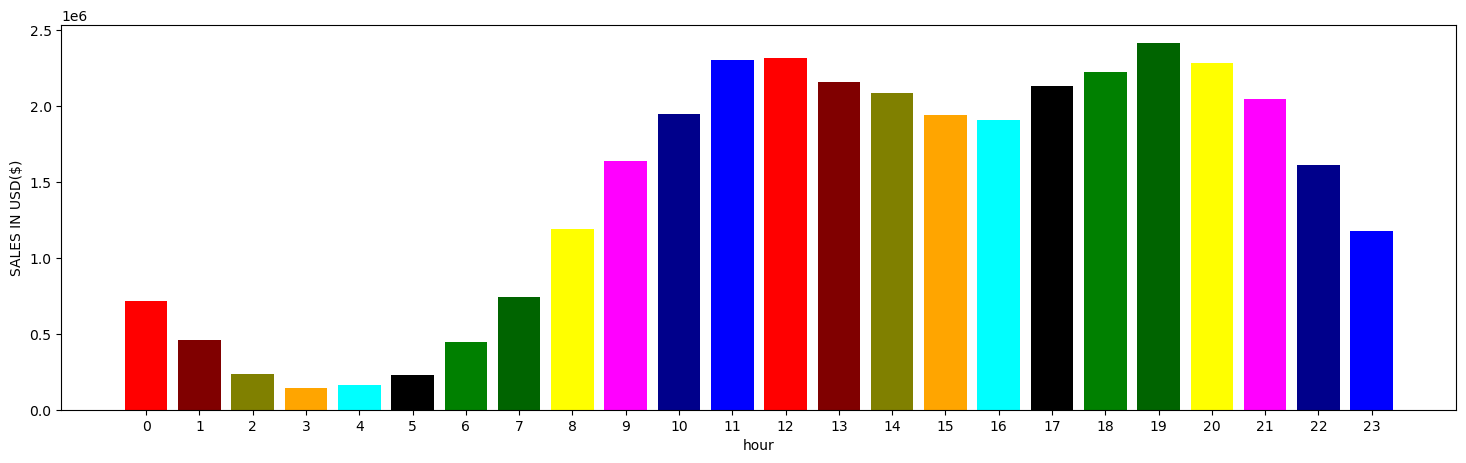

In [137]:
tobi=plt.figure(figsize=(18,5))
plt.bar(x="hour",height="sales",data=data_sales_hour,color=col_nam)
plt.xticks(data_sales_hour["hour"])
plt.ylabel("SALES IN USD($)")
plt.xlabel("hour")
plt.axis("tight")
plt.show()

In [139]:
data_new["year"]=data_new["Order Date"].dt.year

In [140]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day,day_name,hour,year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19,Friday,8,2019
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7,Sunday,22,2019
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12,Friday,14,2019
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12,Friday,14,2019
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30,Tuesday,9,2019


In [142]:
data_new["min"]=data_new["Order Date"].dt.minute

In [144]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day,day_name,hour,year,min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19,Friday,8,2019,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7,Sunday,22,2019,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12,Friday,14,2019,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12,Friday,14,2019,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30,Tuesday,9,2019,27


In [155]:
data_new["Purchase Address"][0].split(",")[1]

' Dallas'

In [160]:
data_new["city"]=data_new["Purchase Address"].apply(lambda x:x.split(",")[1])

In [161]:
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,month_name,day,day_name,hour,year,min,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,19,Friday,8,2019,46,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,7,Sunday,22,2019,30,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,12,Friday,14,2019,38,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,12,Friday,14,2019,38,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,30,Tuesday,9,2019,27,Los Angeles


In [158]:
w=lambda a,b :a+b

In [159]:
w(2,5)

7